In [1]:
from plato.environment import Environment

In [2]:
config = {
  "whites":{
    "params":{
    "n_white_infantry":5,
    "n_white_vehicle":0,
    "n_white_drone":0},
    "init":"random"
  },

  "blacks":{
    "params":{
    "n_black_infantry":5,
    "n_black_vehicle":0,
    "n_black_drone":0},
    "init":"random"
  }
}

In [3]:
sim = Environment(config, shape=(10,10))

In [4]:
obs = sim.reset()

In [5]:
for id_,w in sim.whites.items(): print('{:13}'.format(id_), w)

LONDON        <plato.entity.infantry.Infantry object at 0x10d2995d0>
BRAVO         <plato.entity.infantry.Infantry object at 0x10d299810>
WINSLOW       <plato.entity.infantry.Infantry object at 0x10d2998d0>
QUEBEC        <plato.entity.infantry.Infantry object at 0x10d2a1e10>
ANAHEIM       <plato.entity.infantry.Infantry object at 0x10d2a3910>


In [6]:
for id_,w in sim.blacks.items(): print('{:13}'.format(id_), w)

unknown_0     <plato.entity.infantry.Infantry object at 0x10d2a8050>
unknown_1     <plato.entity.infantry.Infantry object at 0x10d2a7fd0>
unknown_2     <plato.entity.infantry.Infantry object at 0x10d2a80d0>
unknown_3     <plato.entity.infantry.Infantry object at 0x10d2aa610>
unknown_4     <plato.entity.infantry.Infantry object at 0x10d2ab110>


In [7]:
minimap = sim.observation(sim.whites, negative=None)
minimap.shape

(25, 10, 10)

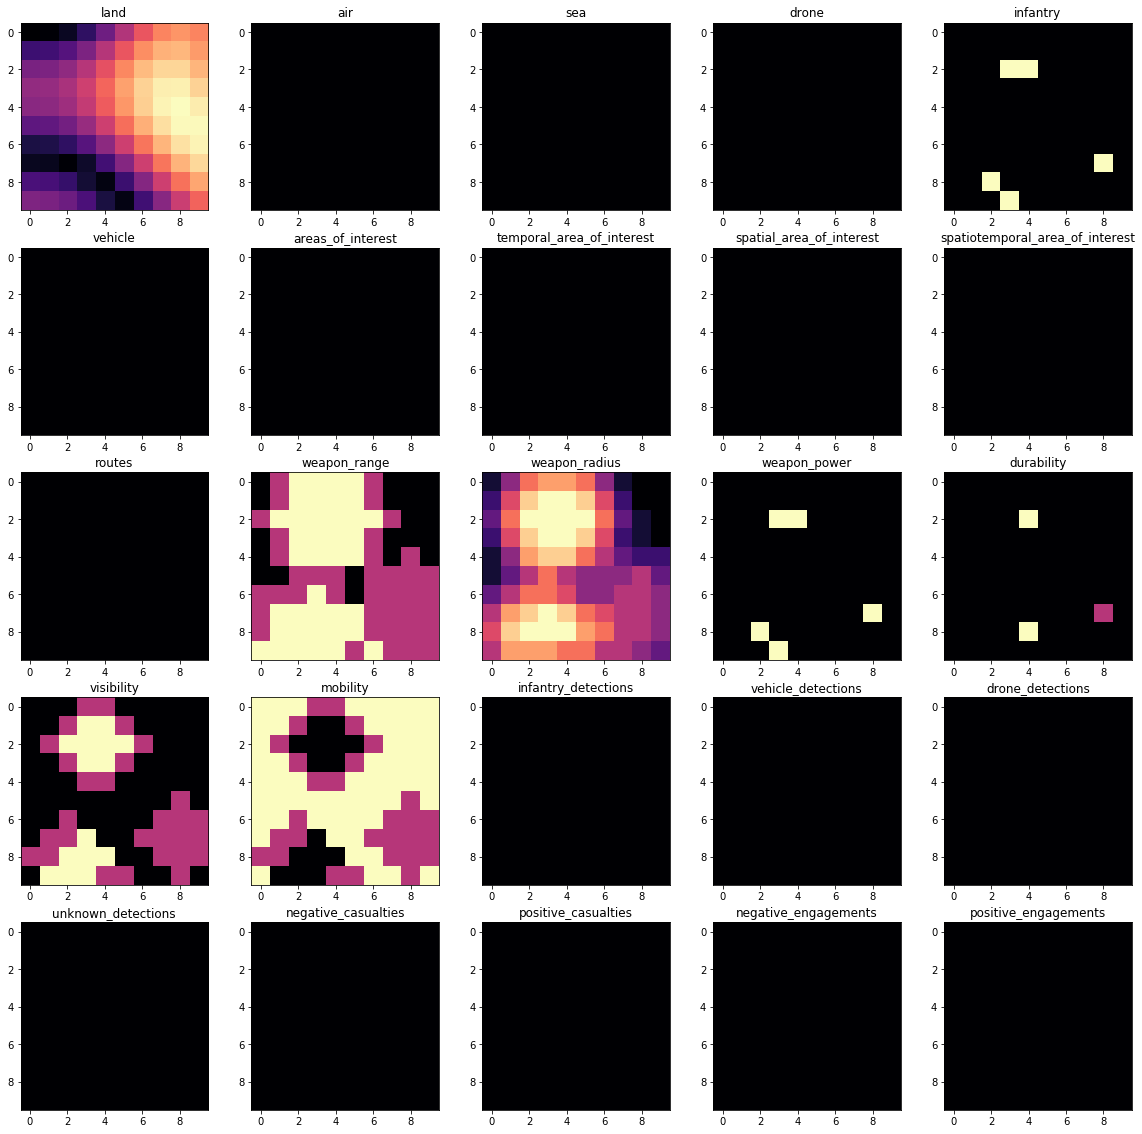

In [8]:
import numpy as np, matplotlib.pyplot as mp
from plato.features import global_features
fig,ax = mp.subplots(5,5, figsize=(20,20))
for itr,(name,feat) in enumerate(zip(global_features, minimap)):
    i,j = np.unravel_index(itr,(5,5))
    ax[i,j].set_title(name)
    ax[i,j].imshow(feat, cmap='magma')
mp.show()

{'STOCKDALE': 'attack_10x11', 'SEAGULL': 'patrol_11x11', 'LONDON': 'attack_12x8', 'WICHITA': 'attack_10x7', 'LITTLEROCK': 'patrol_12x10'}


step 1
{'STOCKDALE': 'attack_10x11', 'SEAGULL': 'patrol_11x11', 'LONDON': 'attack_12x8', 'WICHITA': 'attack_10x7', 'LITTLEROCK': 'patrol_12x10'}
{'unknown_0': 'attack_11x8', 'unknown_1': 'patrol_11x11', 'unknown_2': 'attack_8x10', 'unknown_3': 'attack_10x7', 'unknown_4': 'attack_8x10'}


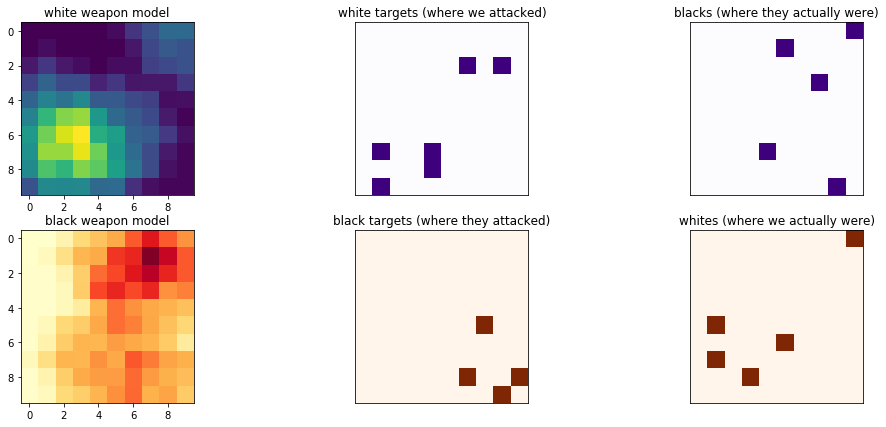

{'STOCKDALE': 'attack_8x10', 'SEAGULL': 'attack_9x9', 'LONDON': 'attack_10x11', 'WICHITA': 'patrol_10x12', 'LITTLEROCK': 'attack_9x12'}


step 2
{'STOCKDALE': 'attack_8x10', 'SEAGULL': 'attack_9x9', 'LONDON': 'attack_10x11', 'WICHITA': 'patrol_10x12', 'LITTLEROCK': 'attack_9x12'}
{'unknown_0': 'attack_11x11', 'unknown_1': 'attack_9x11', 'unknown_2': 'attack_8x12', 'unknown_3': 'attack_9x11', 'unknown_4': 'attack_9x11'}


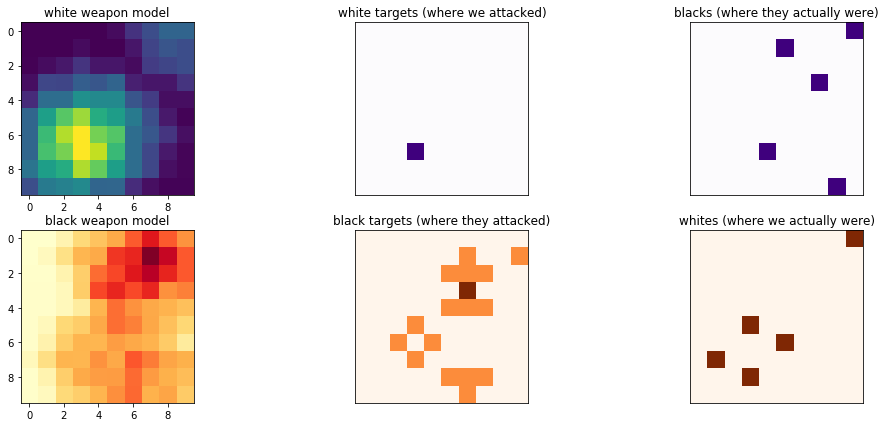

{'STOCKDALE': 'attack_12x9', 'SEAGULL': 'attack_11x8', 'LONDON': 'attack_10x7', 'WICHITA': 'attack_11x12', 'LITTLEROCK': 'attack_9x8'}


step 3
{'STOCKDALE': 'attack_12x9', 'SEAGULL': 'attack_11x8', 'LONDON': 'attack_10x7', 'WICHITA': 'attack_11x12', 'LITTLEROCK': 'attack_9x8'}
{'unknown_0': 'attack_9x11', 'unknown_1': 'attack_7x10', 'unknown_2': 'attack_10x7', 'unknown_3': 'patrol_9x11', 'unknown_4': 'attack_11x12'}


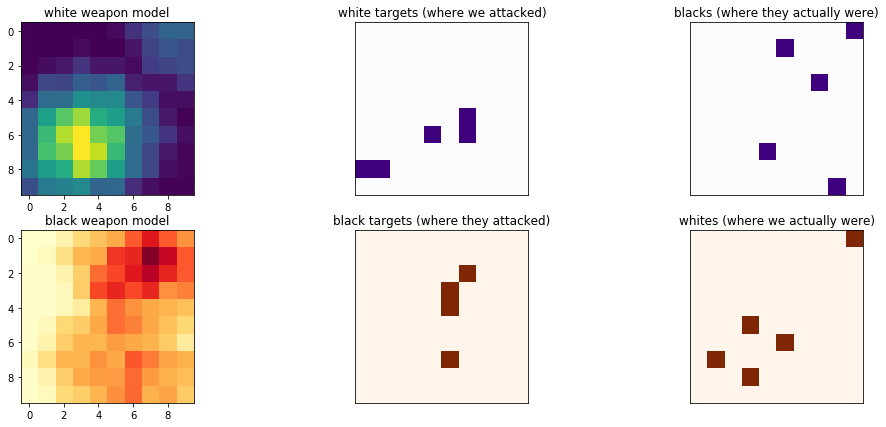

{'STOCKDALE': 'patrol_10x12', 'SEAGULL': 'attack_10x8', 'LONDON': 'attack_12x10', 'WICHITA': 'patrol_11x10', 'LITTLEROCK': 'attack_10x7'}


step 4
{'STOCKDALE': 'patrol_10x12', 'SEAGULL': 'attack_10x8', 'LONDON': 'attack_12x10', 'WICHITA': 'patrol_11x10', 'LITTLEROCK': 'attack_10x7'}
{'unknown_0': 'patrol_8x10', 'unknown_1': 'patrol_8x10', 'unknown_2': 'patrol_10x12', 'unknown_3': 'patrol_10x9', 'unknown_4': 'attack_10x11'}


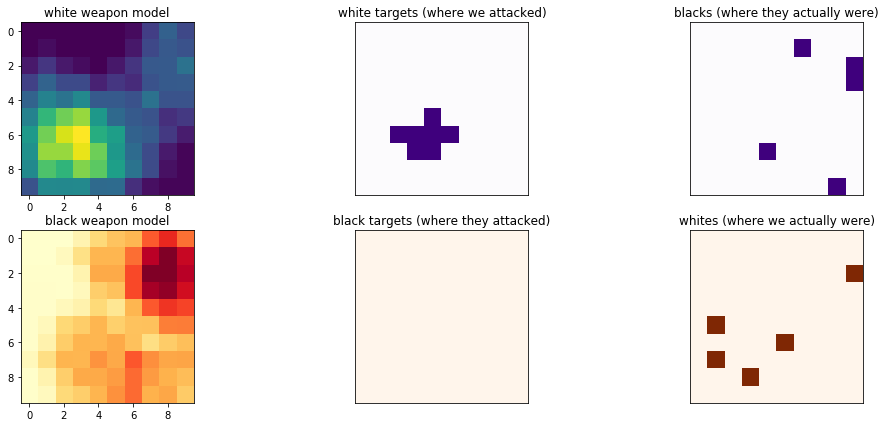

{'STOCKDALE': 'patrol_10x10', 'SEAGULL': 'patrol_9x10', 'LONDON': 'attack_8x12', 'WICHITA': 'attack_8x9', 'LITTLEROCK': 'patrol_9x11'}


step 5
{'STOCKDALE': 'patrol_10x10', 'SEAGULL': 'patrol_9x10', 'LONDON': 'attack_8x12', 'WICHITA': 'attack_8x9', 'LITTLEROCK': 'patrol_9x11'}
{'unknown_0': 'attack_8x11', 'unknown_1': 'attack_12x11', 'unknown_2': 'patrol_9x10', 'unknown_3': 'attack_10x7', 'unknown_4': 'attack_9x11'}


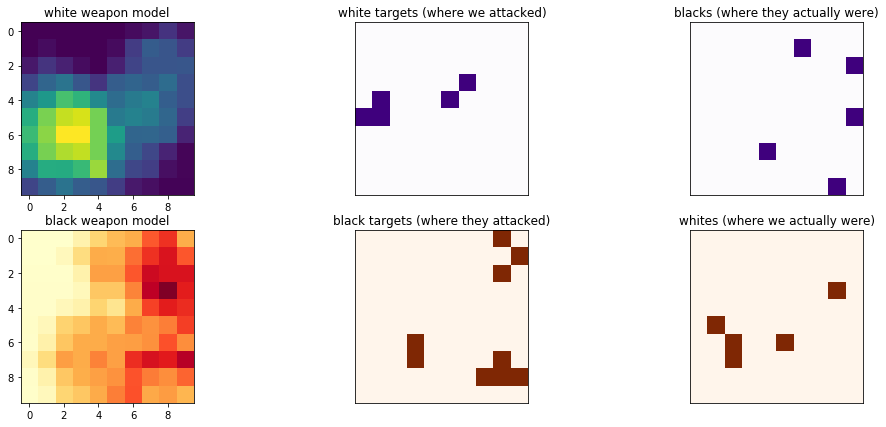

In [9]:
sim.reset()
terminal = False
while not terminal:
    whites = {id:ent.random_action() for id,ent in sim.whites.items() if ent.operational}
    blacks = {id:ent.random_action() for id,ent in sim.blacks.items() if ent.operational}
    
    print({k:sim.whites[k].action_space[v] for k,v in whites.items()})
    
    sprime, reward, terminal, metadata = sim.step(whites, blacks)
    state = sprime
           
    print('\n\nstep', sim.timer)
    
    fig,axs = mp.subplots(2,3, figsize=(17,7))
    ((ax1,ax2,ax3),(ax4,ax5,ax6)) = axs
    for ax in [ax2,ax3,ax5,ax6]: ax.set_xticks([]), ax.set_yticks([])
    white_obs = sim.observation(positive=sim.whites)
    black_obs = sim.observation(positive=sim.blacks)
    
    white_weapons = np.asarray(
                            [
                                white_obs[global_features.index('weapon_range')],
                                white_obs[global_features.index('weapon_radius')]
                            ])
    white_weapon_model = np.mean(white_obs, axis=0)
    
    black_weapons = np.asarray(
                            [
                                black_obs[global_features.index('weapon_range')],
                                black_obs[global_features.index('weapon_radius')]
                            ])
    black_weapon_model = np.mean(black_obs, axis=0)
            
    print({k:sim.whites[k].action_space[v] for k,v in whites.items()})
    ax1.set_title('white weapon model')
    ax1.imshow(white_weapon_model)
    ax2.set_title(r'white targets (where we attacked)')
    ax2.imshow(metadata['positive_damage_map'], cmap='Purples')
    ax3.set_title('blacks (where they actually were)')
    ax3.imshow(metadata['black_map'], cmap='Purples')
    
    print({k:sim.blacks[k].action_space[v] for k,v in blacks.items()})
    ax4.set_title('black weapon model')
    ax4.imshow(black_weapon_model, cmap='YlOrRd')
    ax5.set_title('black targets (where they attacked)')
    ax5.imshow(metadata['negative_damage_map'], cmap='Oranges')
    ax6.set_title('whites (where we actually were)')
    ax6.imshow(metadata['white_map'], cmap='Oranges')
    
    mp.show()
    
    if len(metadata['positive_casualties']) > 0 or len(metadata['negative_casualties']) > 0:
        print('White Kills:', metadata['positive_casualties'])
        for ent in metadata['positive_casualties']: print(ent.id)
        print('Black Kills:', metadata['negative_casualties'])
        for ent in metadata['negative_casualties']: print(ent.id)

    if sim.timer == 5: break